# 112-2 金融大數據 期末專題｜睡眠品質分析

## 數據準備
### 數據欄位：
0. 人員 ID：每個人的識別碼
1. 性別 Gender：人的性別（男/女）
2. 年齡 Age：人的年齡（以歲為單位）
3. 職業 Occupation：人的職業或專業
4. 睡眠時間 Sleep Duration：人每天睡眠的小時數（以小時計）
5. 睡眠品質 Quality of Sleep：睡眠品質的主觀評分（等級：1-10）
6. 身體活動程度 Physical Activity Level：人每天參與身體活動的時間（以分鐘計）
7. 壓力程度：對人所經歷的壓力程度的主觀評級（等級：1-10）
8. BMI Category：人的BMI分類（例如，過輕、正常、超重）
9. 血壓（收縮壓/舒張壓）Blood Pressure (systolic/diastolic)：人的血壓測量值
10. 心率 Heart Rate：人的靜止心率，以每分鐘心跳次數為單位（bpm）
11. 每日步數 Daily Steps：該人每天行走的步數
12. 睡眠障礙 Sleep Disorder：人是否有睡眠障礙（無、失眠、睡眠呼吸中止症）

### 載入資料

In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [550]:
#rawdata = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv',thousands=',')
rawdata = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',thousands=',')
rawdata

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### 觀察數據

In [551]:
rawdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [552]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


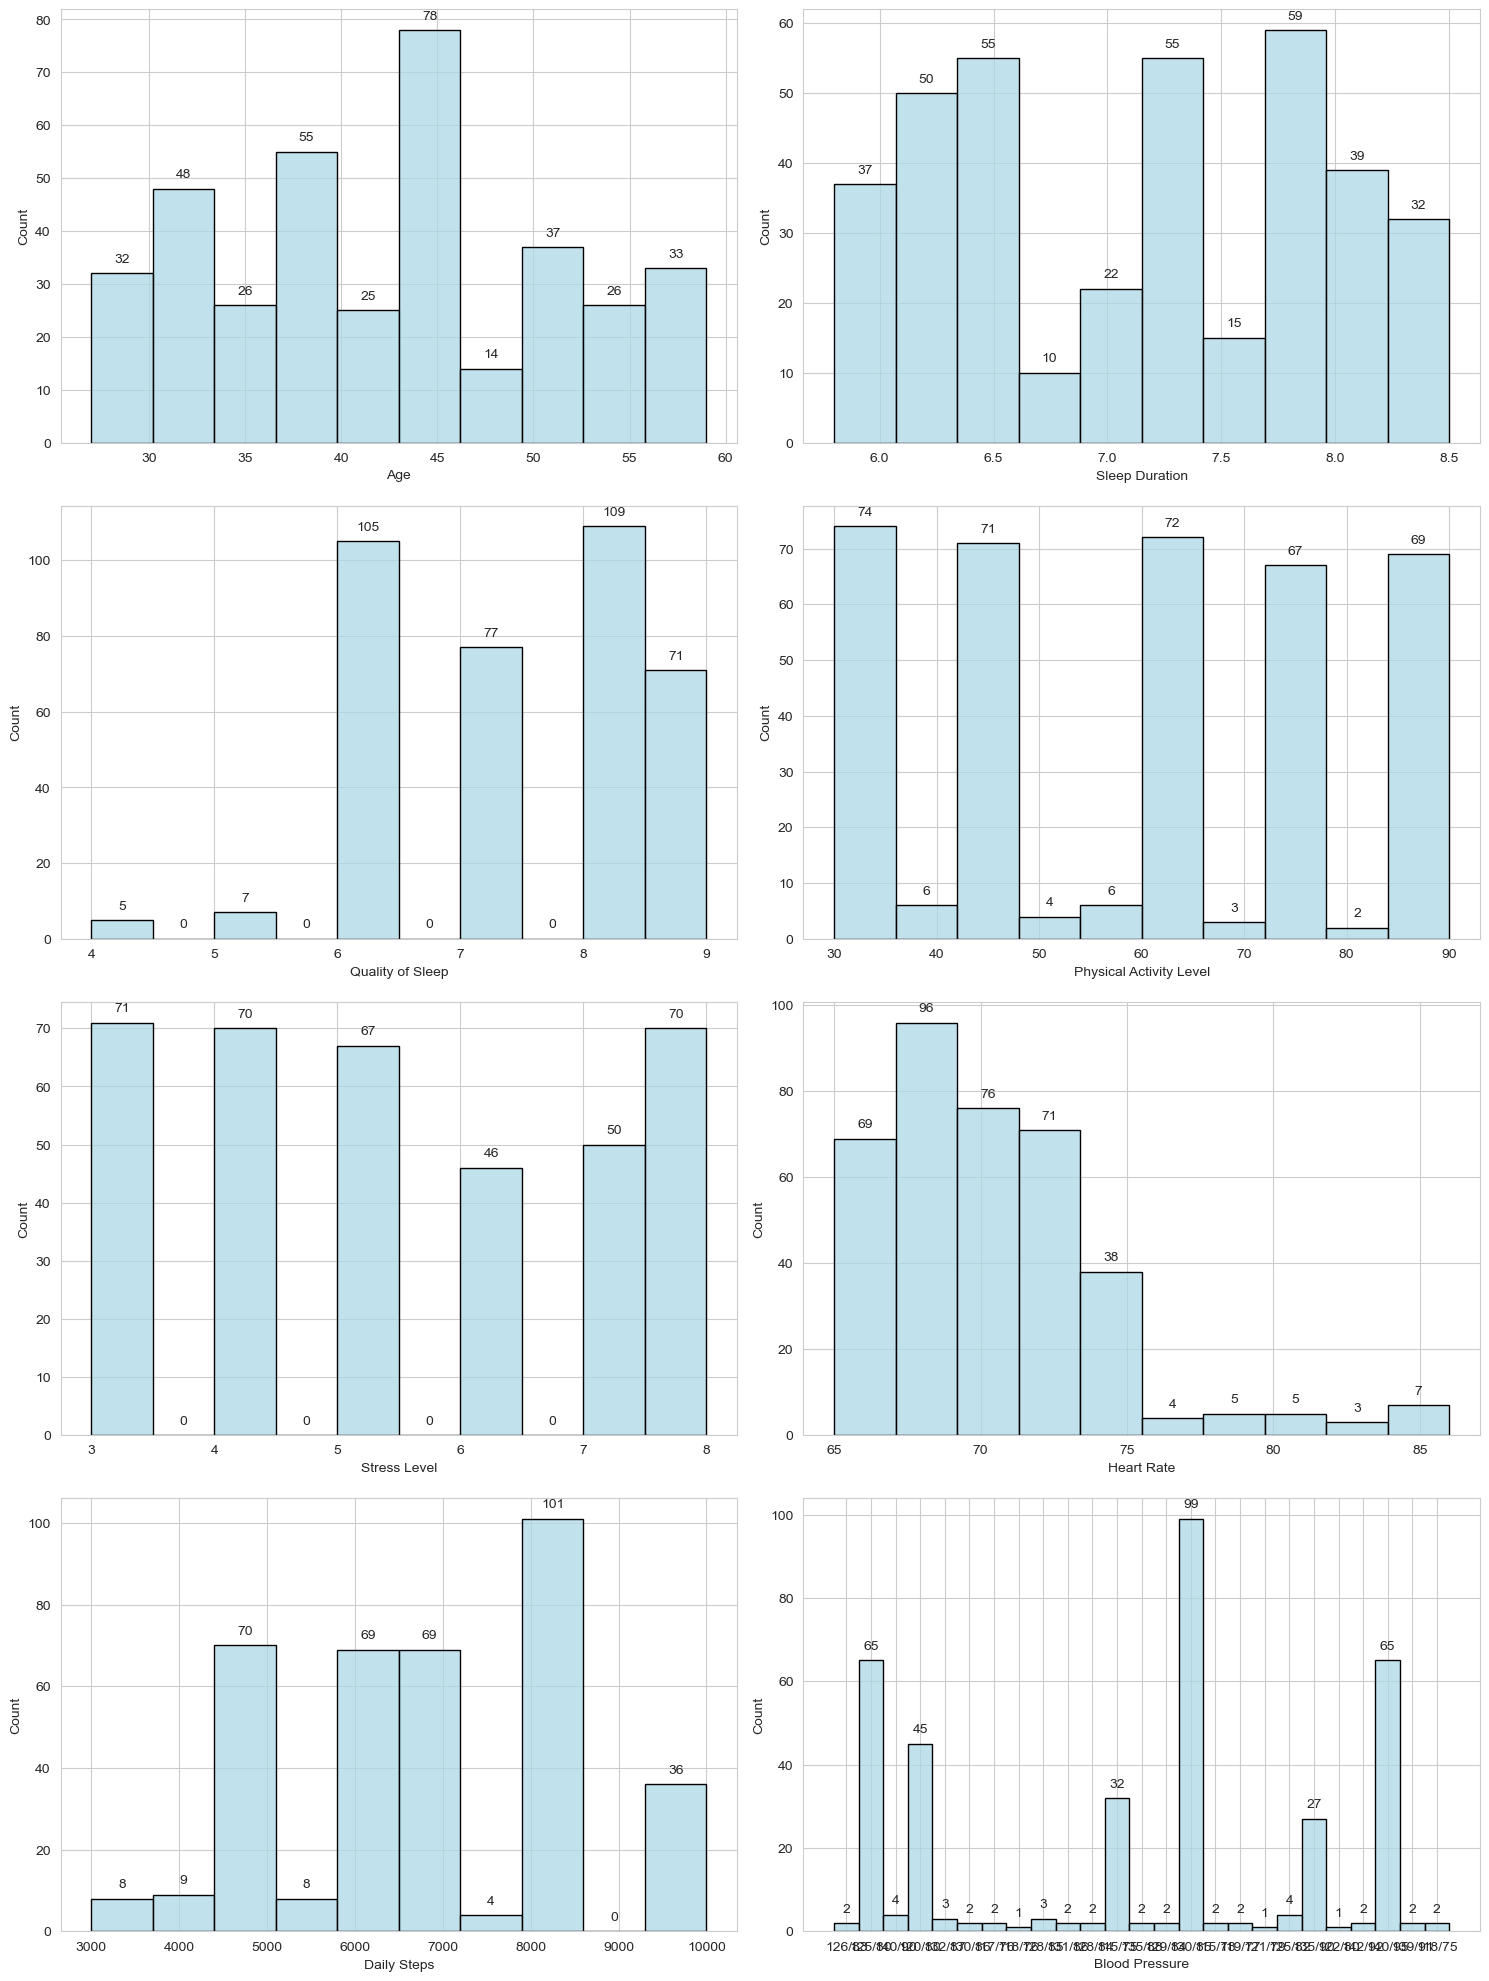

In [553]:
"""
數值型單變量敘述統計（數據處理前）
"""
num_col=['Age','Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level','Heart Rate', 'Daily Steps','Blood Pressure']

fig, axs = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

for i, j in enumerate(num_col):
    sns.histplot(rawdata[j], bins=10, color='lightblue', ax=axs[int(i/2), i%2], edgecolor='black')
    for p in axs[int(i/2), i%2].patches:
        axs[int(i/2), i%2].annotate(format(p.get_height(), '.0f'), 
                                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                                     ha = 'center', va = 'center', 
                                     xytext = (0, 10), 
                                     textcoords = 'offset points')
plt.tight_layout()
plt.show()

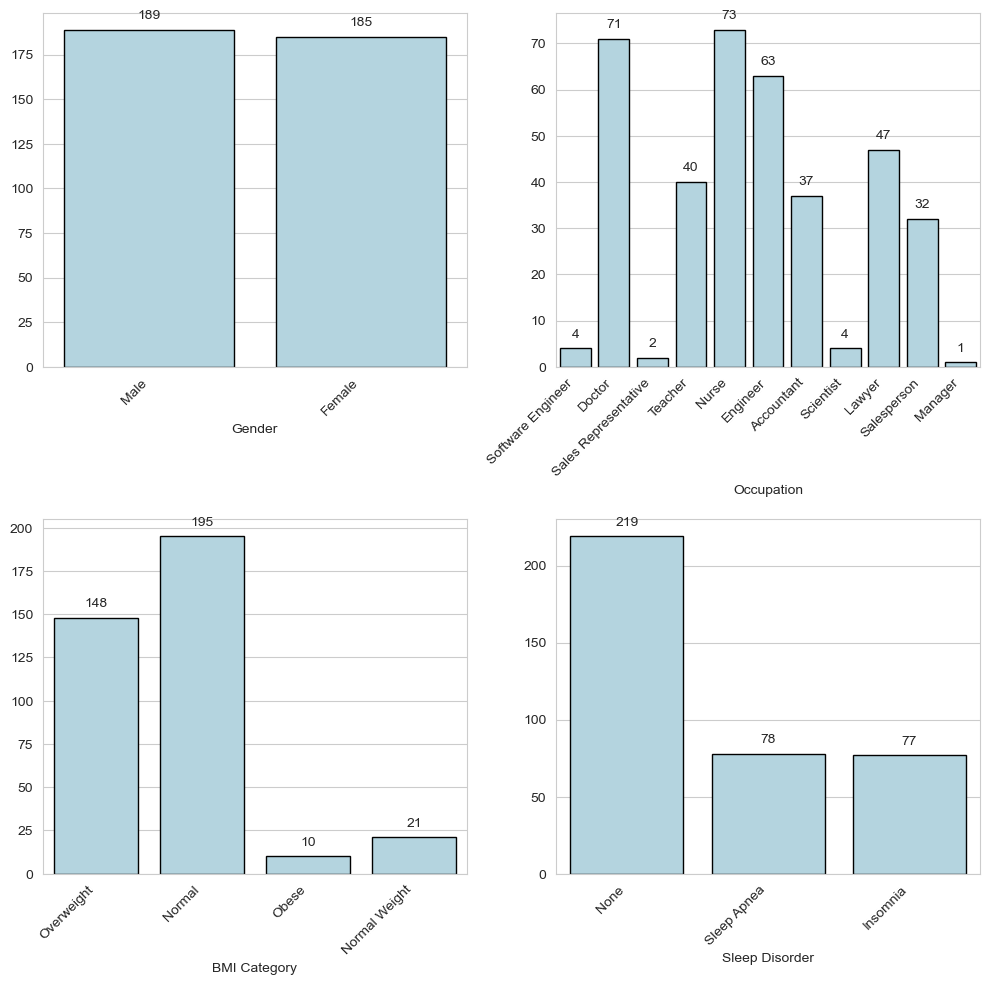

In [554]:
"""
類別型單變量敘述統計（數據處理前）
"""

categorical = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.25, hspace=1)

for i, cat in enumerate(categorical):
    sns.countplot(x=cat, data=rawdata, color='lightblue', ax=axs[int(i/2), i%2],edgecolor='black')
    for p in axs[int(i/2), i%2].patches:
        axs[int(i/2), i%2].annotate(format(p.get_height(), '.0f'), 
                                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                                     ha = 'center', va = 'center', 
                                     xytext = (0, 10), 
                                     textcoords = 'offset points')
    axs[int(i/2), i%2].set_ylabel("") 
    axs[int(i/2), i%2].set_xlabel(cat) 
    axs[int(i/2), i%2].tick_params(axis='x', rotation=45)
    
for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
    
plt.tight_layout()
plt.show()

## 數據處理

In [555]:
dataset = rawdata.copy()

### 欄位重命名

In [556]:
dataset.rename(columns={'Sleep Duration':'Sleep_Duration',
                    'Quality of Sleep':'Sleep_Quality',
                    'Physical Activity Level':'Physical_Activity_Level',
                    'Stress Level':'Stress_Level',
                    'BMI Category':'BMI_Category',
                    'Blood Pressure':'Blood_Pressure',
                    'Heart Rate':'Heart_Rate',
                    'Daily Steps':'Daily_Steps',
                    'Sleep Disorder':'Sleep_Disorder'}, inplace=True)

In [557]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep_Duration           374 non-null    float64
 5   Sleep_Quality            374 non-null    int64  
 6   Physical_Activity_Level  374 non-null    int64  
 7   Stress_Level             374 non-null    int64  
 8   BMI_Category             374 non-null    object 
 9   Blood_Pressure           374 non-null    object 
 10  Heart_Rate               374 non-null    int64  
 11  Daily_Steps              374 non-null    int64  
 12  Sleep_Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### 數據格式標準化

In [558]:
# BMI Category的 Normal 和 Normal Weight 具有相似的含義
# 將 Normal Weight 轉換為 Normal

dataset['BMI_Category'] = np.where(dataset['BMI_Category']=='Normal Weight', 'Normal', dataset['BMI_Category'])

In [559]:
# Sleep Disorder 中有三個類別：沒有睡眠障礙、失眠、睡眠呼吸中止症
# 其中 NaN 表示沒有睡眠障礙，將 NaN 轉換成 Normal

dataset['Sleep_Disorder'] = np.where(dataset['Sleep_Disorder'].isnull(), 'Normal', dataset['Sleep_Disorder'])

### 數據離散化

In [560]:
# 從 Blood Pressure 中提取收縮壓 Systolic 和舒張壓 Diastolic
dataset['Systolic'] = dataset['Blood_Pressure'].str.split('/').str[0].astype(int)
dataset['Diastolic'] = dataset['Blood_Pressure'].str.split('/').str[1].astype(int)

# 離散化 Blood Pressure
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Optimal'
    elif 120 <= systolic < 140 and diastolic < 90:
        return 'Normal'
    elif systolic >= 140 and diastolic >= 90 or diastolic >= 80:
        return 'Hypertension'

# 創建一個新的欄位 BP Category 紀錄血壓分類
dataset['BP_Category'] = dataset.apply(lambda row: bp_category(row['Systolic'], row['Diastolic']), axis=1)

In [561]:
# 離散化 Daliy Steps
def ds_group(daliy_steps):
    if daliy_steps < 5000:
        return '<5000'
    elif 5000<= daliy_steps < 7500:
        return '5000~7499'
    elif 7500<= daliy_steps < 10000:
        return '7500~9999'
    else:
        return '>=10000'

# 創建一個新的欄位 Daliy_Steps_Group 紀錄步數分區
dataset['Daily_Steps_Group'] = dataset.apply(lambda row: ds_group(row['Daily_Steps']), axis=1)

In [562]:
# 離散化 Physical Activity Level
def pa_group(activity):
    if 30 <= activity < 50:
        return 'Low Intensity'
    elif 50 <= activity < 80:
        return 'Moderate Intensity'
    elif 80 <= activity < 100:
        return 'High Intensity'
    else:
        return 'High Intensity'

# 創建一個新的欄位 Physical_Activity_Group 紀錄身體活動程度分區
dataset['Physical_Activity_Group'] = dataset.apply(lambda row: pa_group(row['Physical_Activity_Level']), axis=1)

In [563]:
# 離散化 Sleep Quality
def sq_group(quality):
    if quality in (4, 5):
        return '1'
    elif quality in (6, 7):
        return '2'
    else:
        return '3'
    
# 創建一個新的欄位 Sleep_Quality_Group 紀錄睡眠品質程度分區
dataset['Sleep_Quality_Group'] = dataset.apply(lambda row: sq_group(row['Sleep_Quality']), axis=1)

# 欄位 Sleep_Quality_Group 更名為 Sleep_Quality 紀錄睡眠品質程度分區
dataset['Sleep_Quality'] = dataset['Sleep_Quality_Group']

In [564]:
# 離散化 Sleep Duration
def sd_group(duration):
    if duration <= 6.0:
        return '~6'
    elif duration <= 6.5:
        return '6-6.5'
    elif duration <= 7.0:
        return '6.5-7'
    elif duration <= 7.5:
        return '7-7.5'
    elif duration <= 8.0:
        return '7.5-8'
    else:
        return '8~'

# 創建一個新的欄位 Sleep_Duration_Group 紀錄睡眠時長分區
dataset['Sleep_Duration_Group'] = dataset.apply(lambda row: sd_group(row['Sleep_Duration']), axis=1)

print(dataset[['Sleep_Duration', 'Sleep_Duration_Group']])

     Sleep_Duration Sleep_Duration_Group
0               6.1                6-6.5
1               6.2                6-6.5
2               6.2                6-6.5
3               5.9                   ~6
4               5.9                   ~6
..              ...                  ...
369             8.1                   8~
370             8.0                7.5-8
371             8.1                   8~
372             8.1                   8~
373             8.1                   8~

[374 rows x 2 columns]


In [565]:
# 離散化 Heart Rate
def hr_group(rate):
    if rate <= 70:
        return '~70'
    elif rate <= 75:
        return '70-75'
    elif rate <= 80:
        return '75-80'
    elif rate <= 85:
        return '80-85'
    else:
        return '85~'

# 創建一個新的欄位 Heart_Group 紀錄心率分區
dataset['Heart_Rate_Group'] = dataset.apply(lambda row: hr_group(row['Heart_Rate']), axis=1)

print(dataset[['Heart_Rate', 'Heart_Rate_Group']])

     Heart_Rate Heart_Rate_Group
0            77            75-80
1            75            70-75
2            75            70-75
3            85            80-85
4            85            80-85
..          ...              ...
369          68              ~70
370          68              ~70
371          68              ~70
372          68              ~70
373          68              ~70

[374 rows x 2 columns]


In [566]:
# 離散化 Stress Level
def sl_group(level):
    if level <= 3:
        return '1'
    elif level <= 4:
        return '2'
    elif level <= 5:
        return '3'
    elif level <= 6:
        return '4'
    elif level <= 7:
        return '5'
    else:
        return '6'

# 創建一個新的欄位 Heart_Group 紀錄心率分區
dataset['Stress_Level_Group'] = dataset.apply(lambda row: sl_group(row['Stress_Level']), axis=1)

print(dataset[['Stress_Level', 'Stress_Level_Group']])

     Stress_Level Stress_Level_Group
0               6                  4
1               8                  6
2               8                  6
3               8                  6
4               8                  6
..            ...                ...
369             3                  1
370             3                  1
371             3                  1
372             3                  1
373             3                  1

[374 rows x 2 columns]


In [567]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep_Duration           374 non-null    float64
 5   Sleep_Quality            374 non-null    object 
 6   Physical_Activity_Level  374 non-null    int64  
 7   Stress_Level             374 non-null    int64  
 8   BMI_Category             374 non-null    object 
 9   Blood_Pressure           374 non-null    object 
 10  Heart_Rate               374 non-null    int64  
 11  Daily_Steps              374 non-null    int64  
 12  Sleep_Disorder           374 non-null    object 
 13  Systolic                 374 non-null    int64  
 14  Diastolic                3

### 類別重編碼

In [568]:
# 定義重編碼規則
recode_dict = {
    'Doctor': 'Medical',
    'Nurse': 'Medical',
    'Sales Representative': 'Sales',
    'Salesperson': 'Sales',
    'Scientist': 'Engineer',
    'Software Engineer': 'Engineer',
    'Engineer': 'Engineer',
    'Teacher': 'Other',
    'Accountant': 'Other',
    'Lawyer': 'Other',
    'Manager': 'Other'
}

# 使用replace函數進行類別重編碼
dataset['Occupation'] = dataset['Occupation'].replace(recode_dict)
dataset['Occupation'].value_counts()

Medical     144
Other       125
Engineer     71
Sales        34
Name: Occupation, dtype: int64

### 去除用不到的欄位

In [569]:
# 去除用不到的欄位 Blood_Pressure, Systolic, Diastolic, Daily_Steps, Physical_Activity_Level
dataset.drop(columns=['Blood_Pressure', 'Systolic', 'Diastolic', 'Daily_Steps', 'Physical_Activity_Level', 'Sleep_Quality_Group'], axis=1, inplace=True)

In [570]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep_Duration           374 non-null    float64
 5   Sleep_Quality            374 non-null    object 
 6   Stress_Level             374 non-null    int64  
 7   BMI_Category             374 non-null    object 
 8   Heart_Rate               374 non-null    int64  
 9   Sleep_Disorder           374 non-null    object 
 10  BP_Category              374 non-null    object 
 11  Daily_Steps_Group        374 non-null    object 
 12  Physical_Activity_Group  374 non-null    object 
 13  Sleep_Duration_Group     374 non-null    object 
 14  Heart_Rate_Group         3

In [571]:
dataset.to_csv('Sleep_health_and_lifestyle_dataset_processed.csv', index=False)

## 數據探索
### 識別類別變量和數值變量

In [572]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep_Duration           374 non-null    float64
 5   Sleep_Quality            374 non-null    object 
 6   Stress_Level             374 non-null    int64  
 7   BMI_Category             374 non-null    object 
 8   Heart_Rate               374 non-null    int64  
 9   Sleep_Disorder           374 non-null    object 
 10  BP_Category              374 non-null    object 
 11  Daily_Steps_Group        374 non-null    object 
 12  Physical_Activity_Group  374 non-null    object 
 13  Sleep_Duration_Group     374 non-null    object 
 14  Heart_Rate_Group         3

In [573]:
dataset.describe()

,Person ID,Age,Sleep_Duration,Stress_Level,Heart_Rate
count,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,5.385027,70.165775
std,108.108742,8.673133,0.795657,1.774526,4.135676
min,1.000000,27.000000,5.800000,3.000000,65.000000
25%,94.250000,35.250000,6.400000,4.000000,68.000000
50%,187.500000,43.000000,7.200000,5.000000,70.000000
75%,280.750000,50.000000,7.800000,7.000000,72.000000
max,374.000000,59.000000,8.500000,8.000000,86.000000


### 單變量敘述統計

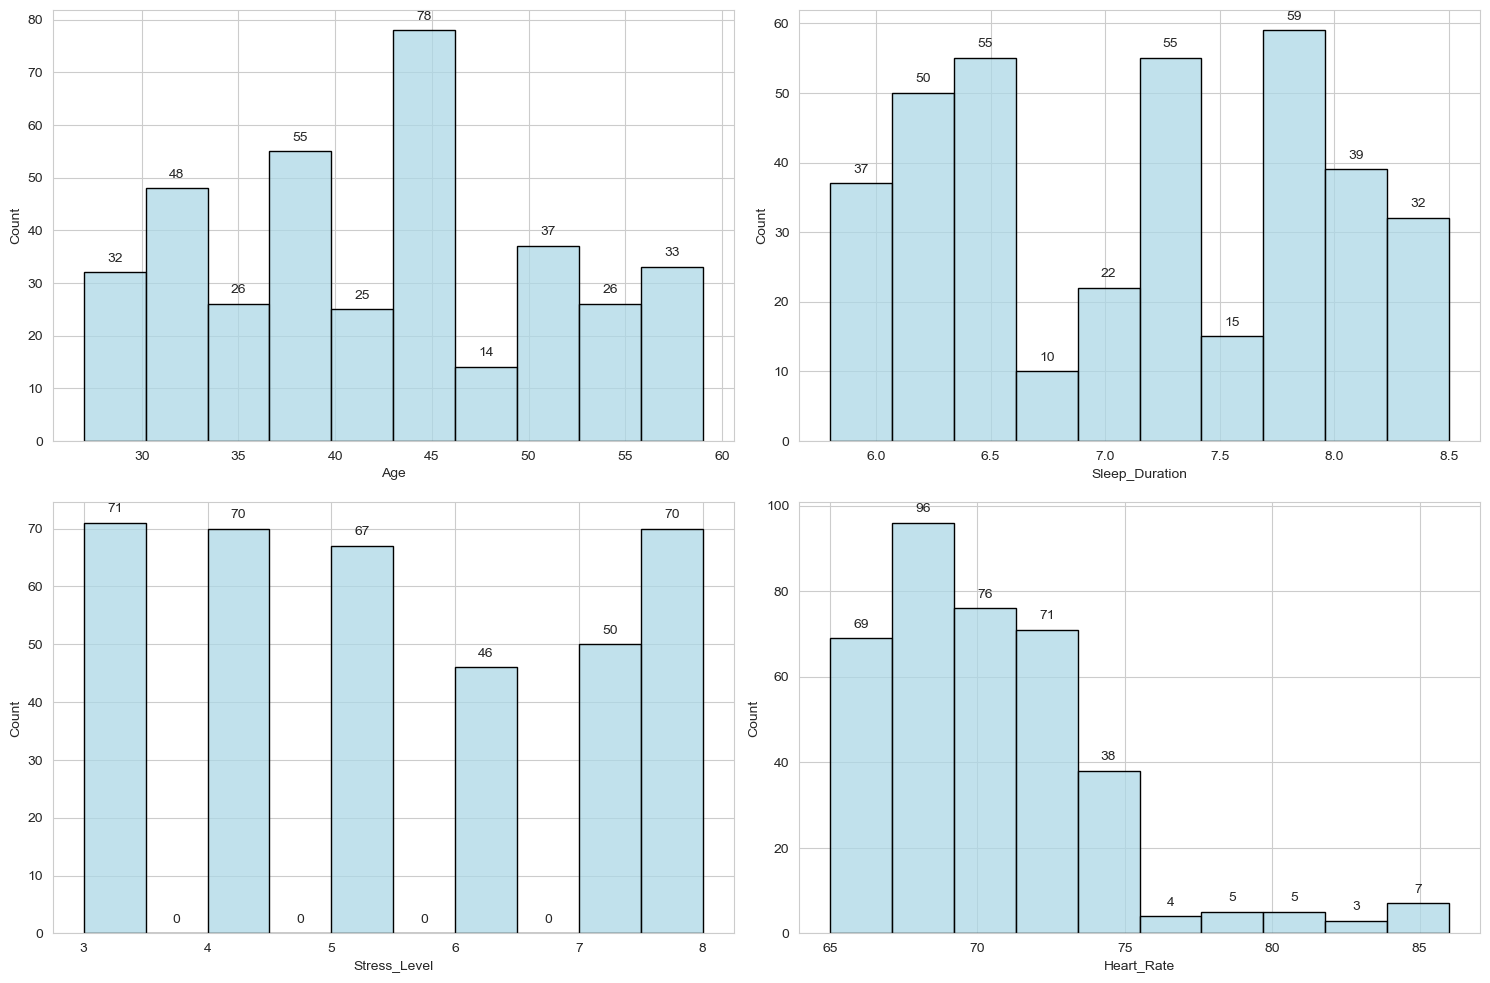

In [574]:
num_col = ['Age', 'Sleep_Duration', 'Stress_Level', 'Heart_Rate']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

for i, col in enumerate(num_col):
    row = i // 2
    col_pos = i % 2
    sns.histplot(dataset[col], bins=10, color='lightblue', ax=axs[row, col_pos], edgecolor='black')
    for p in axs[row, col_pos].patches:
        axs[row, col_pos].annotate(format(p.get_height(), '.0f'), 
                                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                                   ha='center', va='center', 
                                   xytext=(0, 10), 
                                   textcoords='offset points')

plt.tight_layout()
plt.show()

### 定義順序型類別的順序

In [575]:
from pandas.api.types import CategoricalDtype

# 定義順序型類別的順序
bmi_order = CategoricalDtype(['Normal', 'Overweight', 'Obese'], ordered=True)
steps_order = CategoricalDtype(['<5000', '5000~7499', '7500~9999', '>=10000'], ordered=True)
activity_order = CategoricalDtype(['Low Intensity', 'Moderate Intensity', 'High Intensity'], ordered=True)
blook_pressure_order = CategoricalDtype(['Optimal', 'Normal', 'Hypertension'], ordered=True)
sleep_quality_order = CategoricalDtype(['1', '2', '3'], ordered=True)

# 將列轉換為順序型類別
dataset['BMI_Category'] = dataset['BMI_Category'].astype(bmi_order)
dataset['Daily_Steps_Group'] = dataset['Daily_Steps_Group'].astype(steps_order)
dataset['Physical_Activity_Group'] = dataset['Physical_Activity_Group'].astype(activity_order)
dataset['BP_Category'] = dataset['BP_Category'].astype(blook_pressure_order)
dataset['Sleep_Quality'] = dataset['Sleep_Quality'].astype(sleep_quality_order)

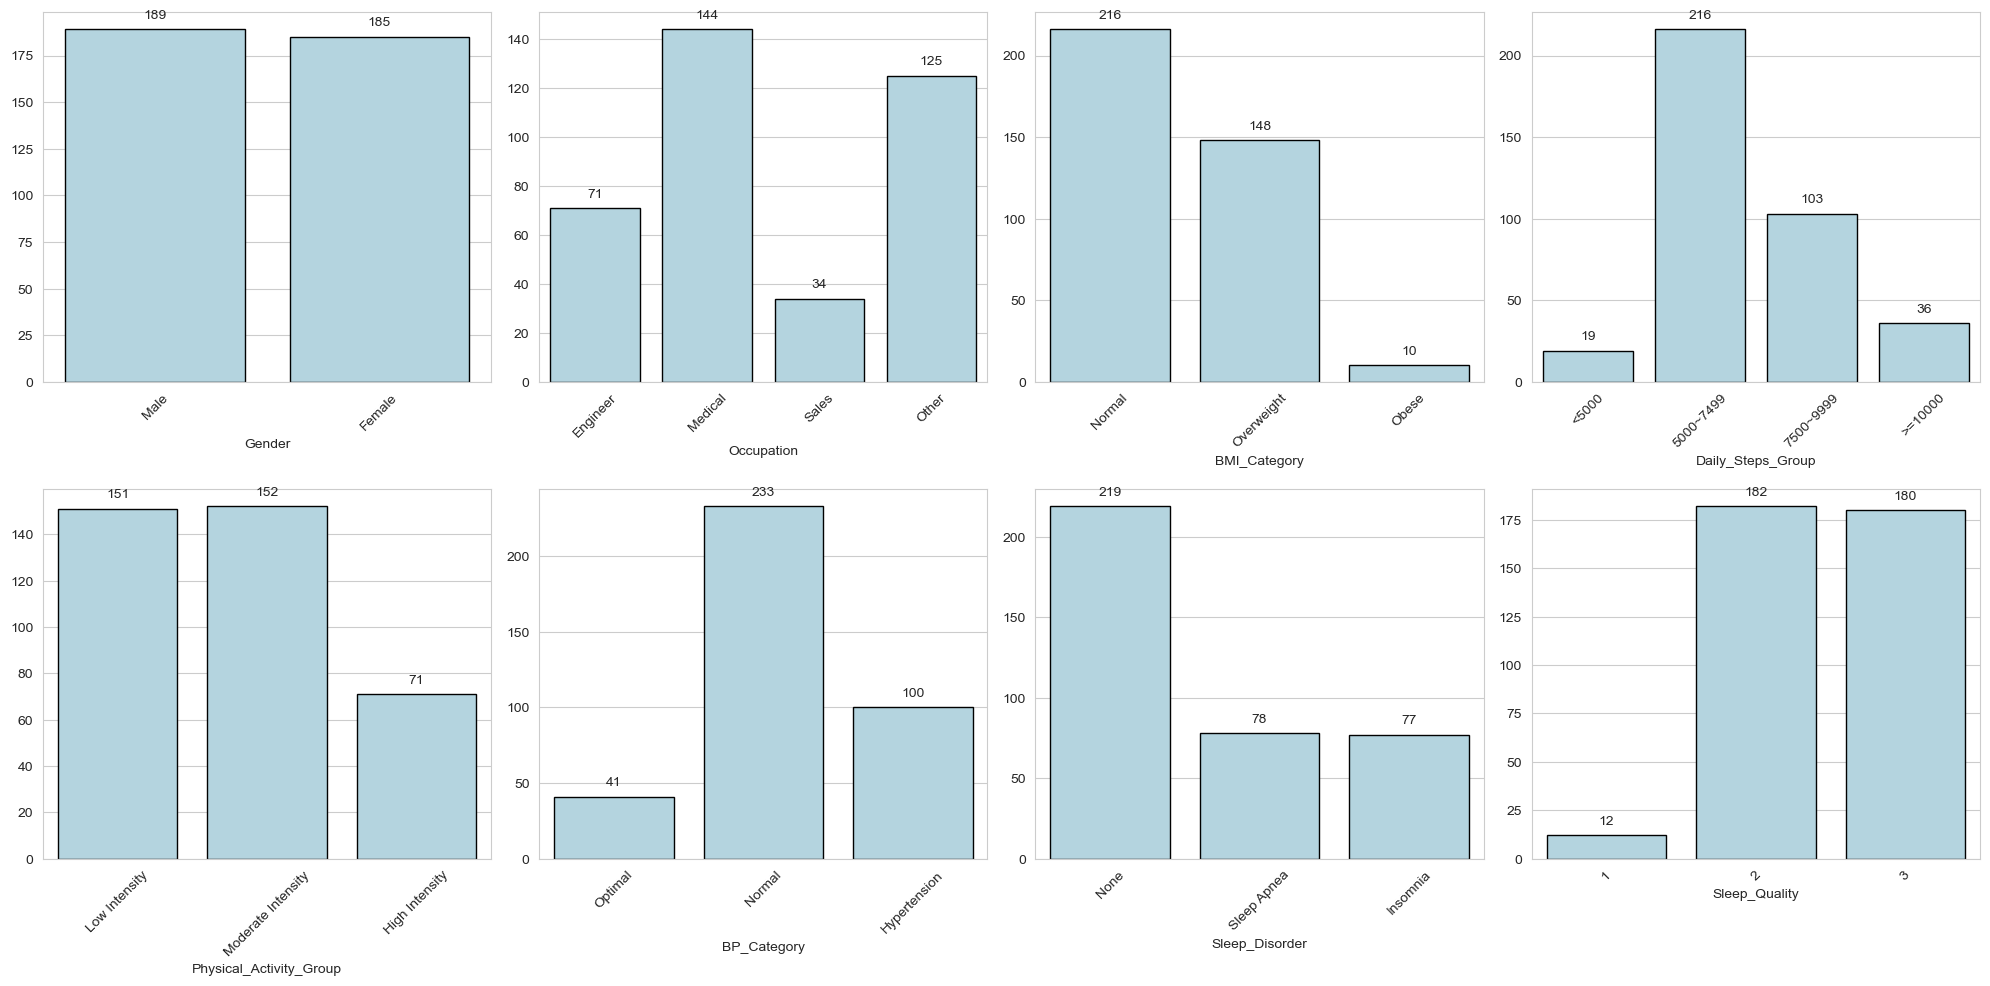

In [576]:
categorical = ['Gender', 'Occupation', 'BMI_Category', 'Daily_Steps_Group', 'Physical_Activity_Group', 'BP_Category', 'Sleep_Disorder', 'Sleep_Quality']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, cat in enumerate(categorical):
    row = i // 4
    col = i % 4
    sns.countplot(x=cat, data=dataset, color='lightblue', ax=axs[row, col], edgecolor='black',
                  order=dataset[cat].cat.categories if dataset[cat].dtype.name == 'category' else None)
    for p in axs[row, col].patches:
        axs[row, col].annotate(format(p.get_height(), '.0f'), 
                               (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha='center', va='center', 
                               xytext=(0, 10), 
                               textcoords='offset points')
    axs[row, col].set_ylabel("") 
    axs[row, col].set_xlabel(cat) 
    axs[row, col].tick_params(axis='x', rotation=45)

for j in range(len(categorical), 8):
    fig.delaxes(axs[1, j % 4])

plt.tight_layout()
plt.show()

### 對類別型數據編碼

In [577]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()
# categorical = ['Gender', 'Occupation', 'BMI_Category', 'Daily_Steps_Group', 'Physical_Activity_Group', 'BP_Category', 'Sleep_Disorder', 'Sleep_Quality']

encode_dataset = dataset.copy()
encode_dataset['Gender'] = label_encoder.fit_transform(encode_dataset['Gender'])
encode_dataset['Occupation'] = label_encoder.fit_transform(encode_dataset['Occupation'])
encode_dataset['BMI_Category'] = label_encoder.fit_transform(encode_dataset['BMI_Category'])
encode_dataset['Daily_Steps_Group'] = label_encoder.fit_transform(encode_dataset['Daily_Steps_Group'])
encode_dataset['Physical_Activity_Group'] = label_encoder.fit_transform(encode_dataset['Physical_Activity_Group'])
encode_dataset['BP_Category'] = label_encoder.fit_transform(encode_dataset['BP_Category'])
encode_dataset['Sleep_Disorder'] = label_encoder.fit_transform(encode_dataset['Sleep_Disorder'])
encode_dataset['Sleep_Quality'] = label_encoder.fit_transform(encode_dataset['Sleep_Quality'])
encode_dataset['Sleep_Duration_Group'] = label_encoder.fit_transform(encode_dataset['Sleep_Duration_Group'])
encode_dataset['Heart_Rate_Group'] = label_encoder.fit_transform(encode_dataset['Heart_Rate_Group'])
encode_dataset['Stress_Level_Group'] = label_encoder.fit_transform(encode_dataset['Stress_Level_Group'])

encode_dataset.head()

,Person ID,Gender,Age,Occupation,Sleep_Duration,Sleep_Quality,Stress_Level,BMI_Category,Heart_Rate,Sleep_Disorder,BP_Category,Daily_Steps_Group,Physical_Activity_Group,Sleep_Duration_Group,Heart_Rate_Group,Stress_Level_Group
0,1,1,27,0,6.1,1,6,2,77,1,1,2,1,0,1,3
1,2,1,28,1,6.2,1,8,0,75,1,1,3,2,0,0,5
2,3,1,28,1,6.2,1,8,0,75,1,1,3,2,0,0,5
3,4,1,28,3,5.9,0,8,1,85,2,0,2,1,5,2,5
4,5,1,28,3,5.9,0,8,1,85,2,0,2,1,5,2,5


In [578]:
encode_dataset.drop(columns=['Heart_Rate', 'Sleep_Duration', 'Stress_Level'], axis=1, inplace=True)

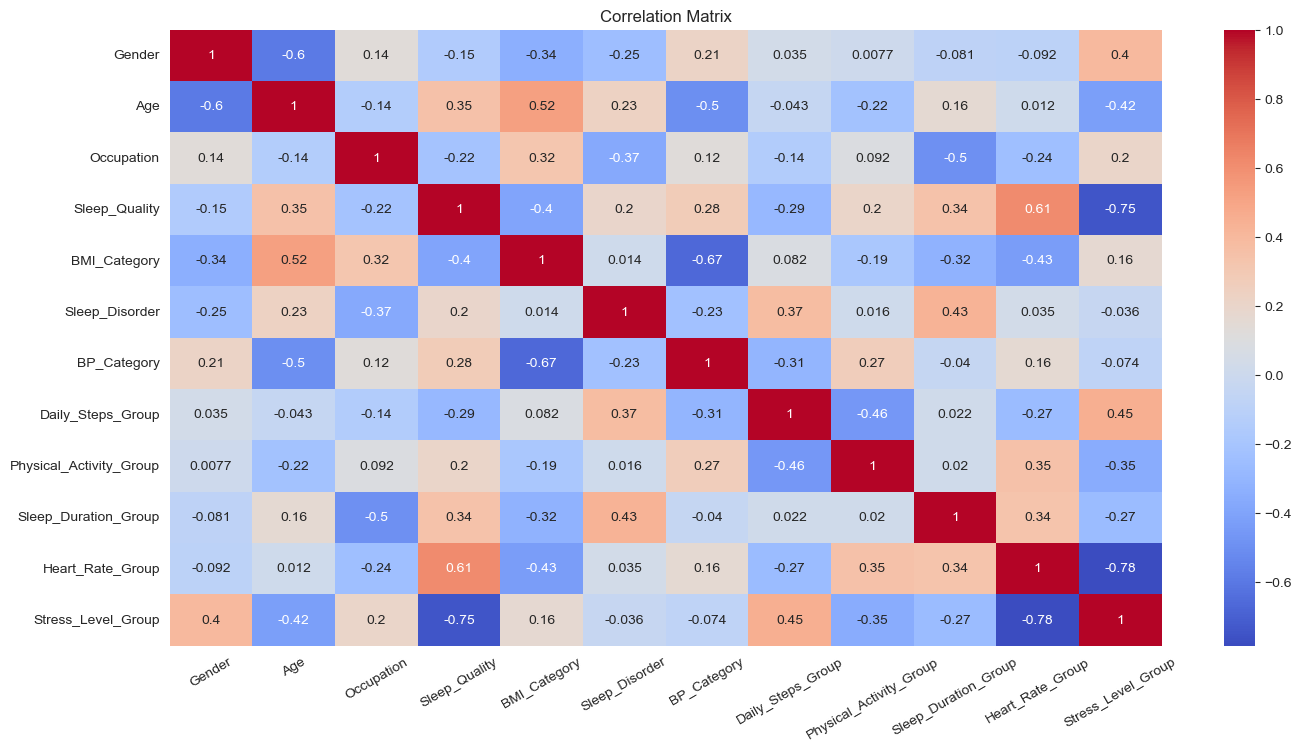

In [579]:
dataset_without_id = encode_dataset.drop(columns=['Person ID'])

correlation_matrix = dataset_without_id.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=30)
plt.show()

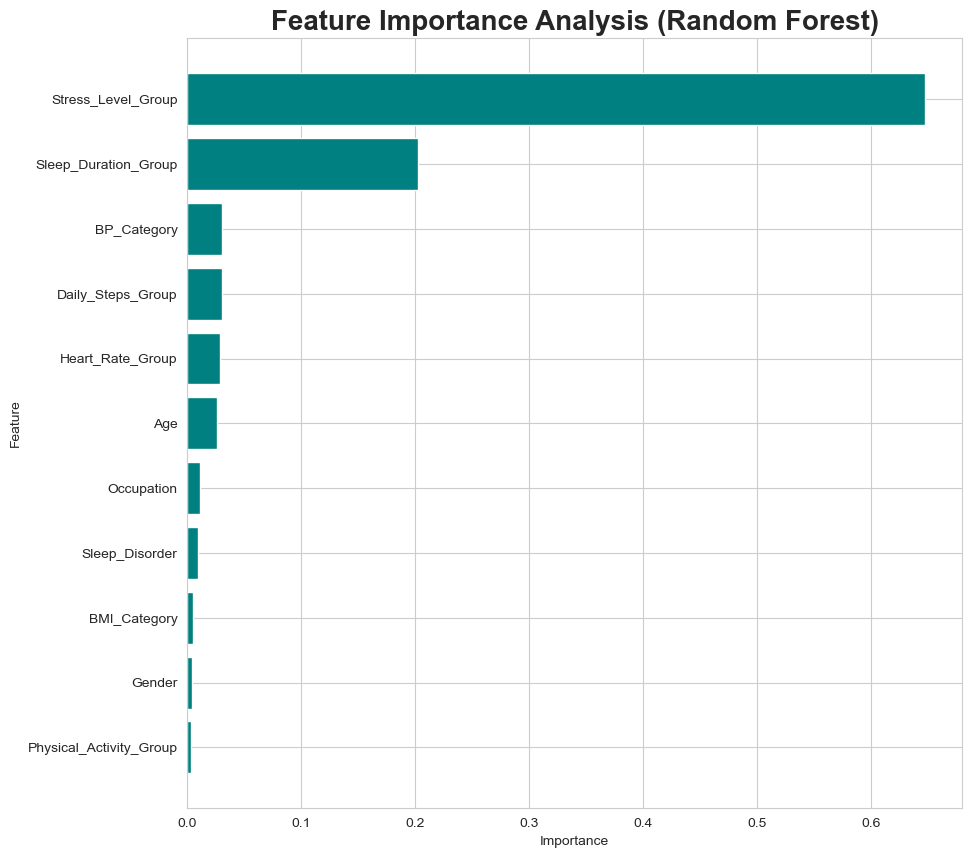

In [580]:
dataset_without_id = encode_dataset.drop(columns=['Person ID'])

numerical_data = dataset_without_id.select_dtypes(include=['int64', 'float64'])

X = numerical_data.drop(columns=['Sleep_Quality'])
y = dataset_without_id['Sleep_Quality']

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X, y)

feature_importances = rf_regressor.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis (Random Forest)', fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.show()

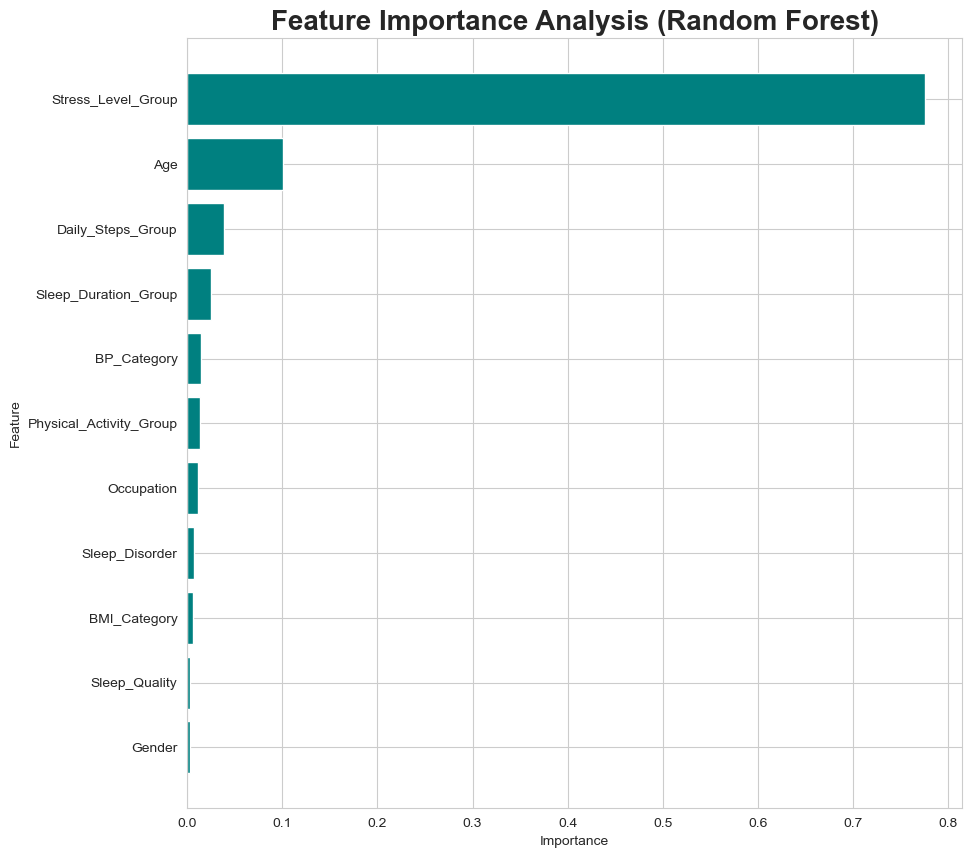

In [581]:
dataset_without_id = encode_dataset.drop(columns=['Person ID'])

numerical_data = dataset_without_id.select_dtypes(include=['int64', 'float64'])

X = numerical_data.drop(columns=['Heart_Rate_Group'])
y = dataset_without_id['Heart_Rate_Group']

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X, y)

feature_importances = rf_regressor.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis (Random Forest)', fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.show()

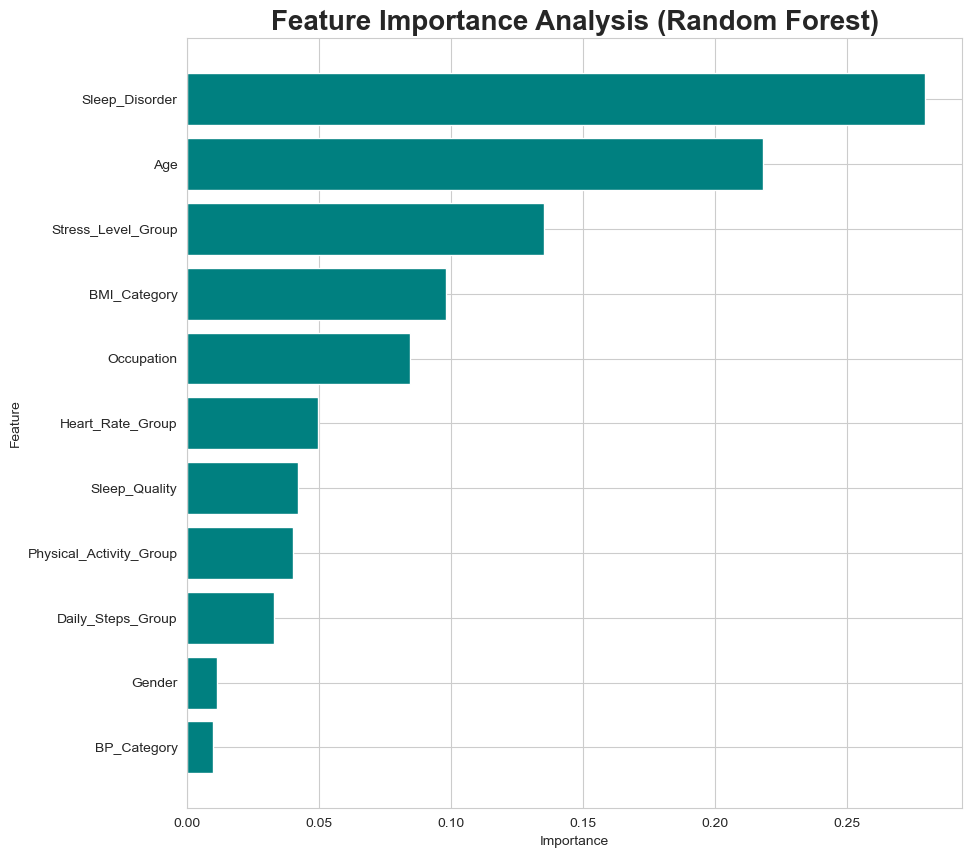

In [582]:
dataset_without_id = encode_dataset.drop(columns=['Person ID'])

numerical_data = dataset_without_id.select_dtypes(include=['int64', 'float64'])

X = numerical_data.drop(columns=['Sleep_Duration_Group'])
y = dataset_without_id['Sleep_Duration_Group']

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X, y)

feature_importances = rf_regressor.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis (Random Forest)', fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.show()

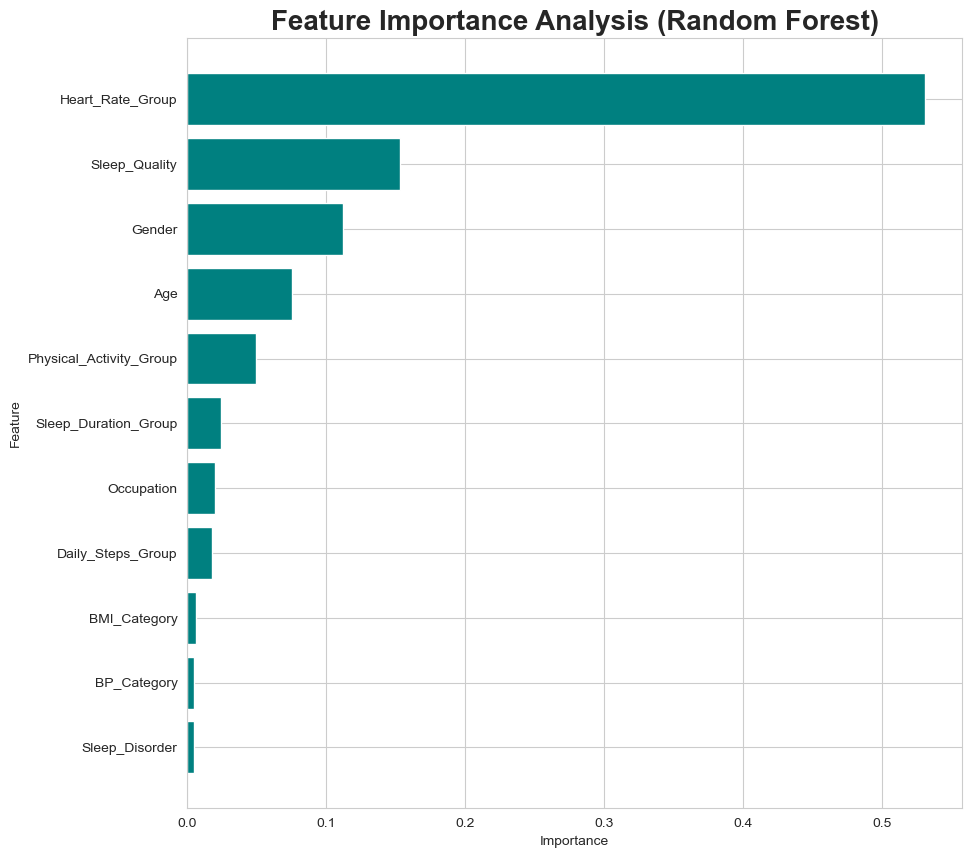

In [583]:
dataset_without_id = encode_dataset.drop(columns=['Person ID'])

numerical_data = dataset_without_id.select_dtypes(include=['int64', 'float64'])

X = numerical_data.drop(columns=['Stress_Level_Group'])
y = dataset_without_id['Stress_Level_Group']

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X, y)

feature_importances = rf_regressor.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis (Random Forest)', fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.show()

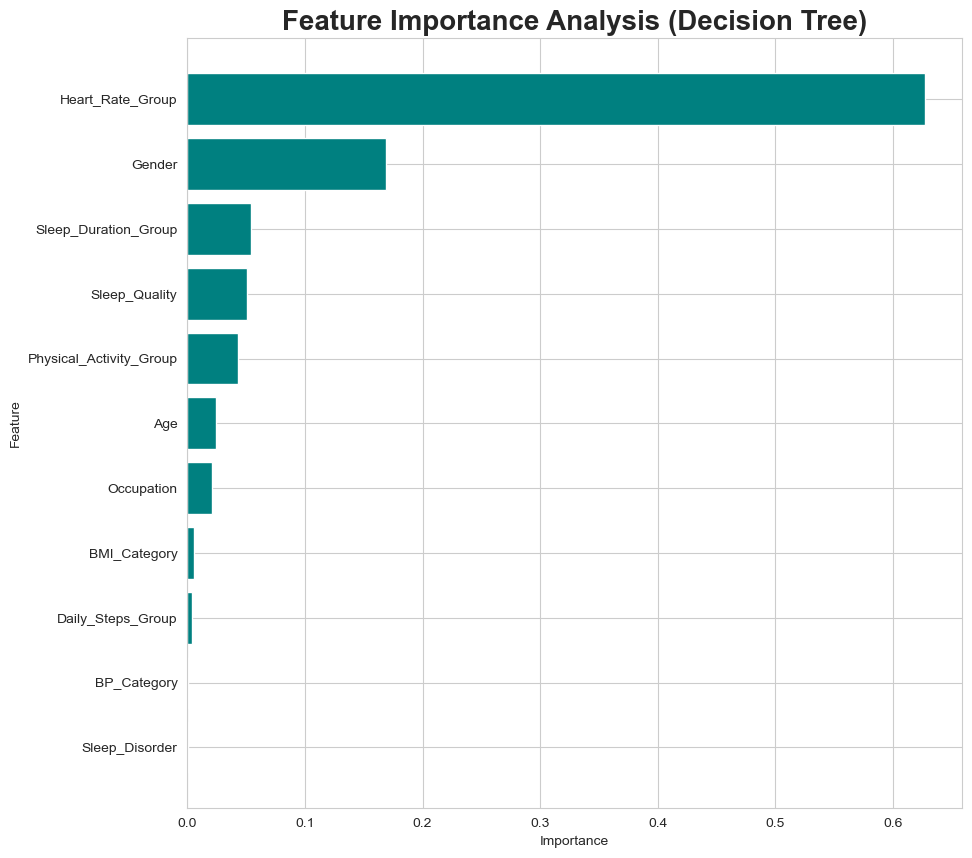

In [584]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd

# 使用 DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X, y)

# 提取特征重要性
feature_importances_dt = dt_regressor.feature_importances_

# 创建特征重要性数据框
feature_importance_df_dt = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_dt})

# 按重要性降序排序
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

# 绘制水平条形图
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df_dt['Feature'], feature_importance_df_dt['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis (Decision Tree)', fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.show()

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

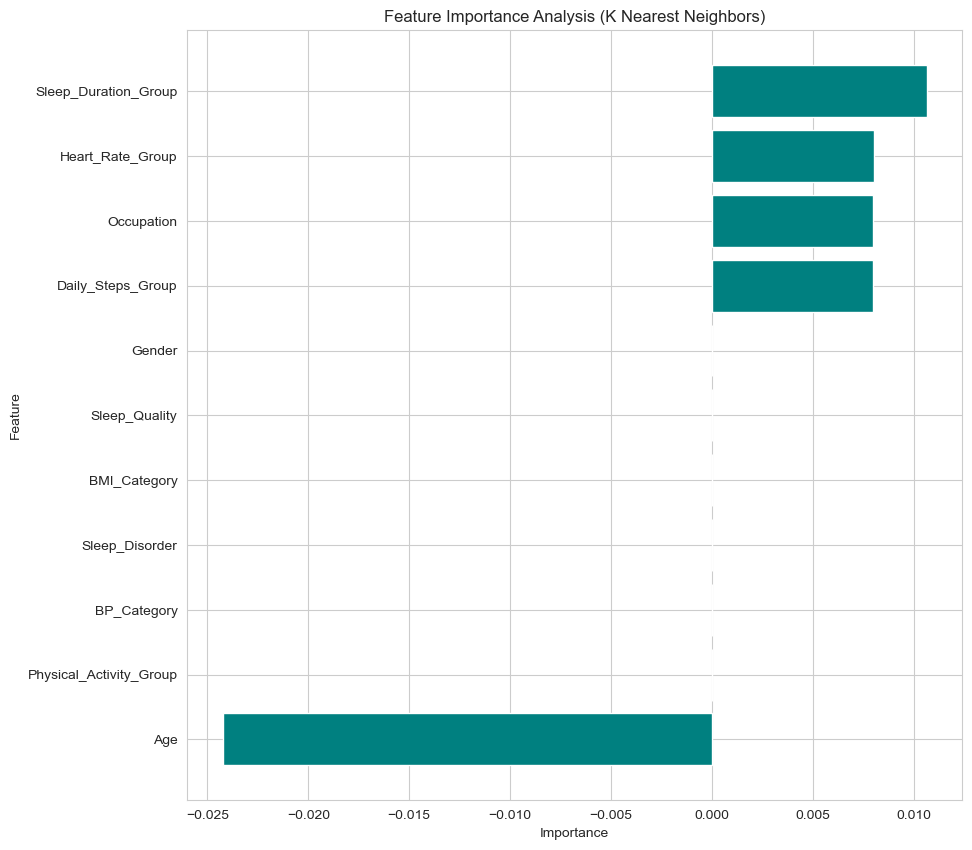

In [585]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# 初始化 KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# 交叉验证评估模型性能
original_scores = cross_val_score(knn_classifier, X, y, cv=5)

# 创建一个空列表用于存储特征重要性
feature_importances_knn = []

# 逐个排除每个特征并重新评估模型性能
for feature in X.columns:
    X_subset = X.drop(columns=[feature])
    scores = cross_val_score(knn_classifier, X_subset, y, cv=5)
    feature_importance = original_scores.mean() - scores.mean()
    feature_importances_knn.append(feature_importance)

# 创建特征重要性数据框
feature_importance_knn_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_knn})

# 按特征重要性降序排序
feature_importance_knn_df = feature_importance_knn_df.sort_values(by='Importance', ascending=False)

# 绘制水平条形图
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_knn_df['Feature'], feature_importance_knn_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis (K Nearest Neighbors)')
plt.gca().invert_yaxis()
plt.show()


### 多變量交叉分析

In [586]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    int64   
 1   Gender                   374 non-null    object  
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    object  
 4   Sleep_Duration           374 non-null    float64 
 5   Sleep_Quality            374 non-null    category
 6   Stress_Level             374 non-null    int64   
 7   BMI_Category             374 non-null    category
 8   Heart_Rate               374 non-null    int64   
 9   Sleep_Disorder           374 non-null    object  
 10  BP_Category              374 non-null    category
 11  Daily_Steps_Group        374 non-null    category
 12  Physical_Activity_Group  374 non-null    category
 13  Sleep_Duration_Group     374 non-null    object  
 14  Heart_Rate

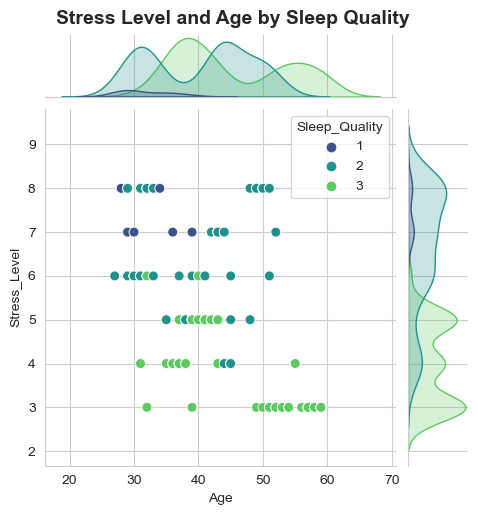

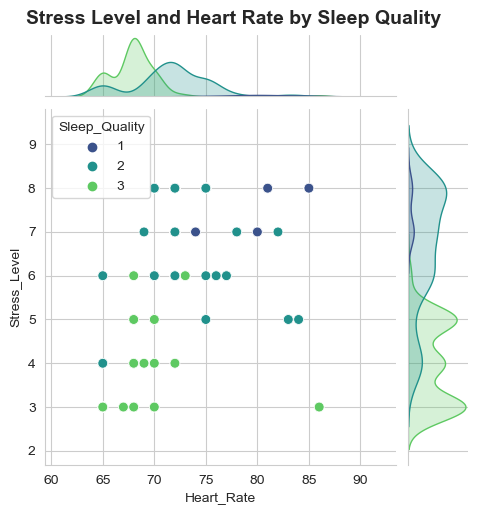

In [587]:

# 设置画布大小和样式
sns.set_style("whitegrid")

# 图 1: 使用 jointplot 展示 Age 与 Stress_Level 和 Sleep_Quality 之间的关系
sns.jointplot(data=dataset, x="Age", y="Stress_Level", hue="Sleep_Quality", palette="viridis", height=5, s=50)
plt.suptitle('Stress Level and Age by Sleep Quality', fontsize=14, fontweight='bold', y=1.02)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Stress Level', fontsize=12)
plt.show()


# 图 2: 使用 jointplot 展示 Age 与 Stress_Level 和 Sleep_Quality 之间的关系
sns.jointplot(data=dataset, x="Heart_Rate", y="Stress_Level", hue="Sleep_Quality", palette="viridis", height=5, s=50)
plt.suptitle('Stress Level and Heart Rate by Sleep Quality', fontsize=14, fontweight='bold', y=1.02)
plt.xlabel('Heart Rate', fontsize=12)
plt.ylabel('Stress Level', fontsize=12)
plt.show()



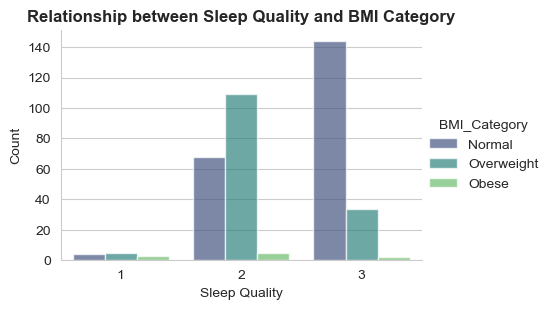

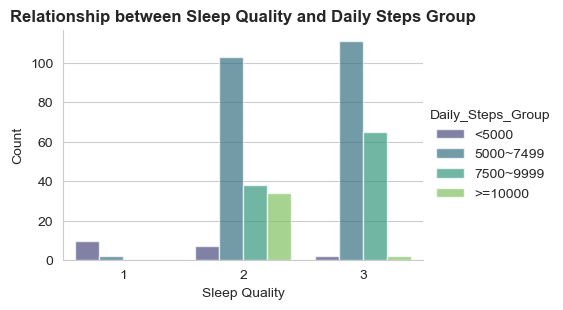

In [588]:
import seaborn as sns
import matplotlib.pyplot as plt

# 繪製 Sleep_Quality 與 BMI_Category 的關係
sns.catplot(data=dataset, x='Sleep_Quality', hue='BMI_Category', kind='count', height=3, aspect=1.5, palette='viridis', alpha=0.7)
plt.title('Relationship between Sleep Quality and BMI Category', fontsize=12, fontweight='bold')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()

# 繪製 Sleep_Quality 與 Daily_Steps_Group 的關係
sns.catplot(data=dataset, x='Sleep_Quality', hue='Daily_Steps_Group', kind='count', height=3, aspect=1.5, palette='viridis', alpha=0.7)
plt.title('Relationship between Sleep Quality and Daily Steps Group', fontsize=12, fontweight='bold')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()
